# 🎬 Netflix Data Analysis & Visualization

**Author:** Soham  
**Tools Used:** Python, Pandas, Seaborn, Matplotlib  
**Dataset:** Netflix Movies and TV Shows (Kaggle)

---

## 📖 Project Overview

This project analyzes Netflix's catalog of movies and TV shows to uncover insights about content trends, popular genres, production countries, and release patterns.  
It demonstrates skills in **data cleaning**, **exploratory data analysis (EDA)**, and **data visualization** using Python.

---


In [20]:
# Basic imports for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # 👈 add this here

# For pretty plots
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")


In [19]:
print("Jupyter is working fine!")


Jupyter is working fine!


## 📂 Step 2: Load the Dataset
Let's load the Netflix dataset and take a first look at the data.


In [26]:
# Step 2: Load dataset
data = pd.read_csv("netflix_titles.csv")
data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 🔍 Step 3: Explore Basic Information
Let's understand our data — check data types, missing values, and duplicates.


In [27]:
# Step 3: View info, missing values, and duplicates
print(data.info())

print("\nMissing values per column:\n")
print(data.isnull().sum())

print("\nDuplicate entries:", data.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Missing values per column:

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_i

## 🧽 Step 4: Clean the Data
We’ll handle missing values, fill gaps with appropriate labels, and remove duplicates.


In [28]:
# Step 4: Fill missing values and remove duplicates
data.drop_duplicates(inplace=True)

data['director'].fillna('Not Available', inplace=True)
data['cast'].fillna('Not Available', inplace=True)
data['country'].fillna('Not Available', inplace=True)
data['date_added'].fillna('Unknown', inplace=True)
data['rating'].fillna('Not Rated', inplace=True)
data['duration'].fillna('Unknown', inplace=True)

# Verify cleaning
print("✅ Missing values after cleaning:\n")
print(data.isnull().sum())


✅ Missing values after cleaning:

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


## 🌎 Step 5: Top 10 Countries Producing Netflix Content
Let's visualize which countries produce the most Netflix titles.


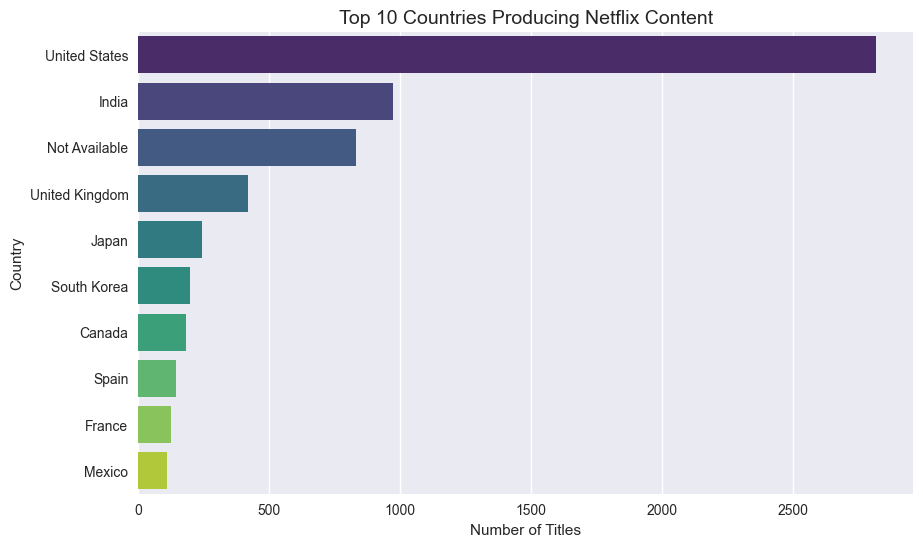

In [29]:
# Step 5: Top 10 countries producing Netflix content
country_data = data['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_data.values, y=country_data.index, palette='viridis')
plt.title('Top 10 Countries Producing Netflix Content', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


## 📆 Step 6: Titles Released Per Year
Let's explore how Netflix’s content production has evolved over time.


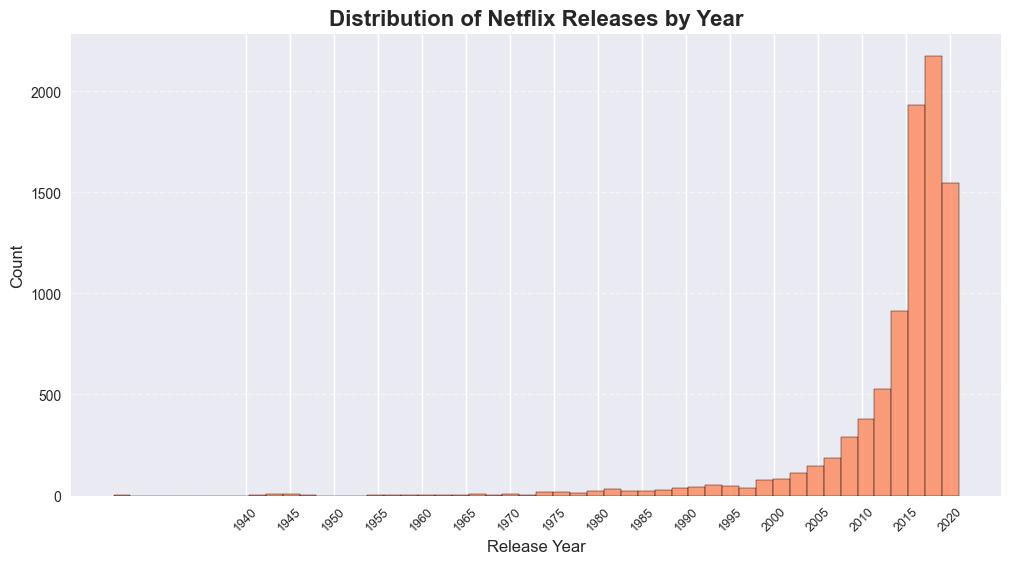

In [32]:
# 📊 Distribution of Content Over the Years (Cleaned Version)
plt.figure(figsize=(12,6))
sns.histplot(df['release_year'], bins=50, kde=False, color='coral')
plt.title("Distribution of Netflix Releases by Year", fontsize=16, weight='bold')
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(
    ticks=range(1940, 2025, 5),  # show every 5 years for clarity
    rotation=45,
    fontsize=9
)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## 📈 Step 7: Trend of Netflix Content Over the Years
A line chart to show how Netflix has grown its content library year by year.


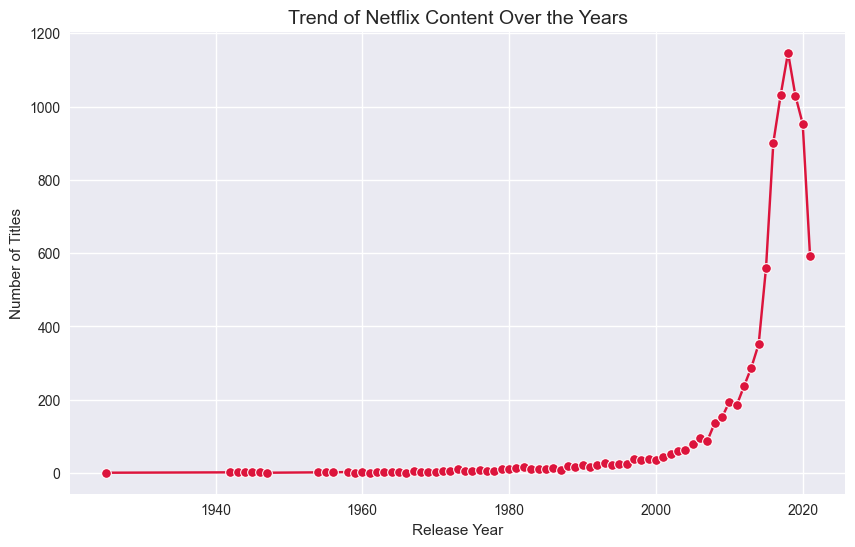

In [33]:
# Step 7: Trend of content released over years
trend = data.groupby('release_year').size().reset_index(name='Count')

plt.figure(figsize=(10,6))
sns.lineplot(x='release_year', y='Count', data=trend, marker='o', color='crimson')
plt.title('Trend of Netflix Content Over the Years', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


## 🎬 Step 8: Movies vs TV Shows
Let's compare the ratio of Movies to TV Shows on Netflix.


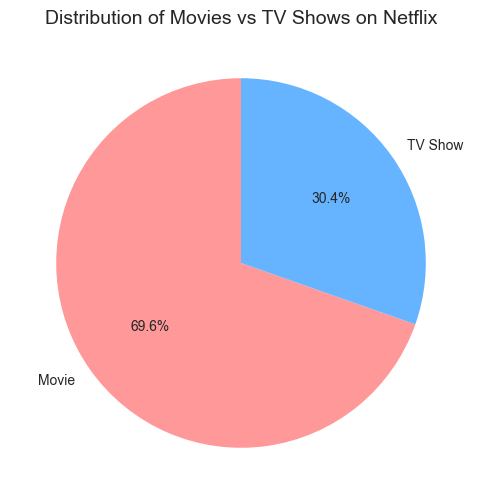

In [34]:
# Step 8: Movies vs TV Shows
type_count = data['type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(type_count.values, labels=type_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Movies vs TV Shows on Netflix', fontsize=14)
plt.show()


## 🎭 Step 9: Most Common Genres
Let's identify which genres are most frequent on Netflix.


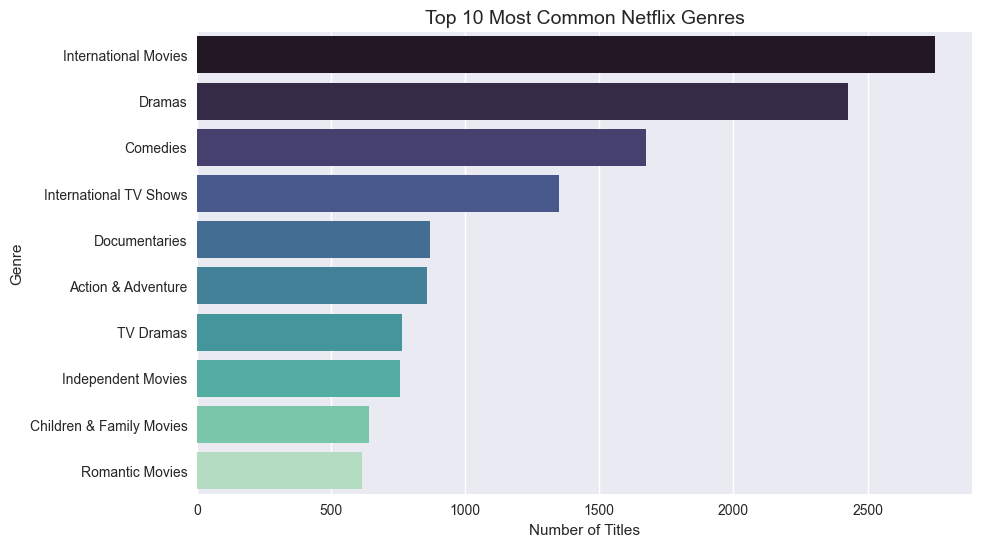

In [35]:
# Step 9: Most Common Genres
from collections import Counter

genre_series = data['listed_in'].dropna().apply(lambda x: x.split(', '))
genres = [genre for sublist in genre_series for genre in sublist]

genre_count = Counter(genres).most_common(10)
genre_df = pd.DataFrame(genre_count, columns=['Genre', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Genre', data=genre_df, palette='mako')
plt.title('Top 10 Most Common Netflix Genres', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()
